## Python statistics essential training - 05_06_bayesian

Standard imports

In [1]:
import math

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib
import matplotlib.pyplot as pp

In [4]:
%matplotlib inline

In [5]:
import pymc3 as pm

In [6]:
n = 100
k = 61
with pm.Model() as coin_context:
    p = pm.Uniform('p',0.4,0.8)
    y = pm.Binomial('y',n=n,p=p,observed = k)
    trace = pm.sample(10000)

/var/folders/b4/9tl2xvtn0cs1qv8814yt82_80000gn/T/ipykernel_42595/307508156.py:6: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(10000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


/Users/muhammadimran/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/muhammadimran/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 20 seconds.


In [7]:
pm.summary(trace)

/Users/muhammadimran/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.608,0.048,0.518,0.699,0.0,0.0,16791.0,25288.0,1.0


/var/folders/b4/9tl2xvtn0cs1qv8814yt82_80000gn/T/ipykernel_42595/4255668653.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
/Users/muhammadimran/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'p'}>,
        <AxesSubplot:title={'center':'p'}>]], dtype=object)

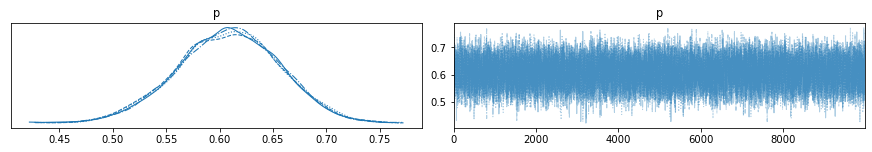

In [8]:
pm.traceplot(trace)

In [9]:
gdata = pd.read_csv('gapminder.csv').query('year==1985')

In [10]:
gdata.sort_values('age5_surviving',inplace=True)

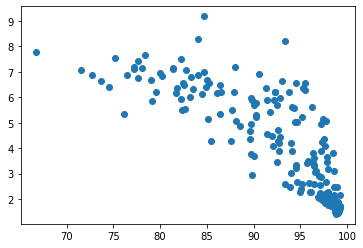

In [11]:
pp.scatter(gdata['age5_surviving'],gdata['babies_per_woman'])

In [12]:
with pm.Model() as gapminder_context:
    intercept = pm.Uniform('intercept',5,15)
    slope = pm.Uniform('slope',-1,1)
    babies = pm.Normal('babies', 
                      mu = intercept + slope *(gdata['age5_surviving']-65),
                      sd = 1,
                      observed = gdata['babies_per_woman'])
    trace = pm.sample(10000)

/var/folders/b4/9tl2xvtn0cs1qv8814yt82_80000gn/T/ipykernel_42595/425401328.py:8: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(10000)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [slope, intercept]


/Users/muhammadimran/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/muhammadimran/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/muhammadimran/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 23 seconds.
The acceptance probability does not match the target. It is 0.8896346518807197, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8847567586794371, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability do

In [13]:
pm.summary(trace)

/Users/muhammadimran/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercept,10.201,0.282,9.656,10.714,0.003,0.002,7212.0,9092.0,1.0
slope,-0.220,0.010,-0.239,-0.200,0.000,0.000,7206.0,8855.0,1.0


/var/folders/b4/9tl2xvtn0cs1qv8814yt82_80000gn/T/ipykernel_42595/4255668653.py:1: DeprecationWarning: The function `traceplot` from PyMC3 is just an alias for `plot_trace` from ArviZ. Please switch to `pymc3.plot_trace` or `arviz.plot_trace`.
  pm.traceplot(trace)
/Users/muhammadimran/opt/anaconda3/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


array([[<AxesSubplot:title={'center':'intercept'}>,
        <AxesSubplot:title={'center':'intercept'}>],
       [<AxesSubplot:title={'center':'slope'}>,
        <AxesSubplot:title={'center':'slope'}>]], dtype=object)

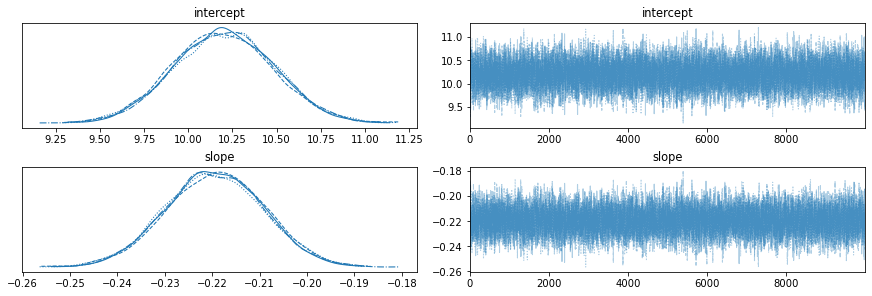

In [14]:
pm.traceplot(trace)

In [15]:
babies = trace['intercept'].mean() + trace['slope'].mean() *(gdata['age5_surviving']-65)

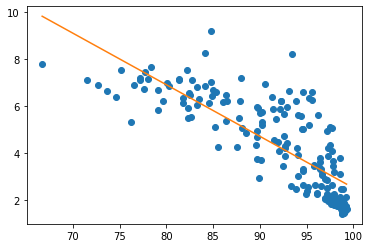

In [17]:
pp.scatter(gdata['age5_surviving'],gdata['babies_per_woman'])
pp.plot(gdata['age5_surviving'],babies,'C1')

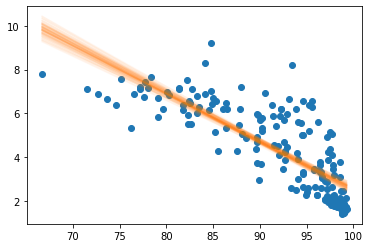

In [20]:
pp.scatter(gdata['age5_surviving'],gdata['babies_per_woman'])
for i,intercept,slope in zip(range(100),trace['intercept'][::50],trace['slope'][::50]):
    babies = intercept + slope * (gdata['age5_surviving']-65)
    pp.plot(gdata['age5_surviving'],babies,'C1',alpha = 0.05)